In [10]:

# help: 
# https://github.com/mvilardell2/sc-RNA-seq/blob/42fb2d0f1888739c0fabf85b3b14402e2905a3dd/vdj/Analysis_R/immunarch.R#L6
# https://immunarch.com/
# https://support.10xgenomics.com/single-cell-vdj/datasets/3.0.0/vdj_v1_mm_c57bl6_pbmc_t?


In [11]:

install.packages("immunarch")           # Install the package

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [12]:
library(immunarch)  # Load library

# Quick Example for immunarch

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Using Names as id variables



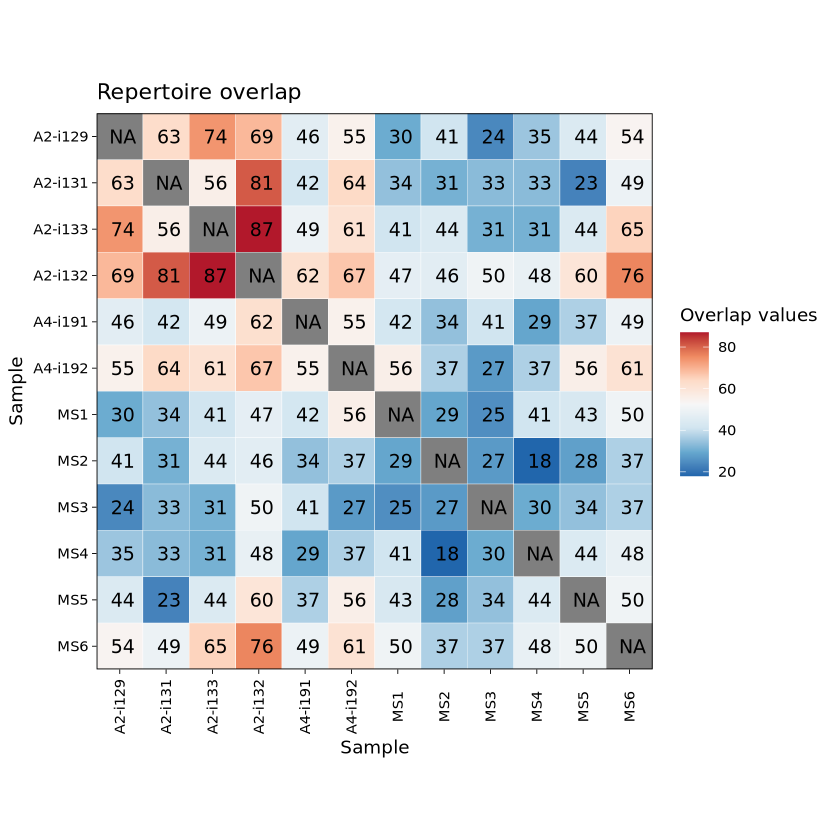

Warning message in geom_signif(data = p_df, aes(xmin = group1, xmax = group2, annotations = p.adj, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”


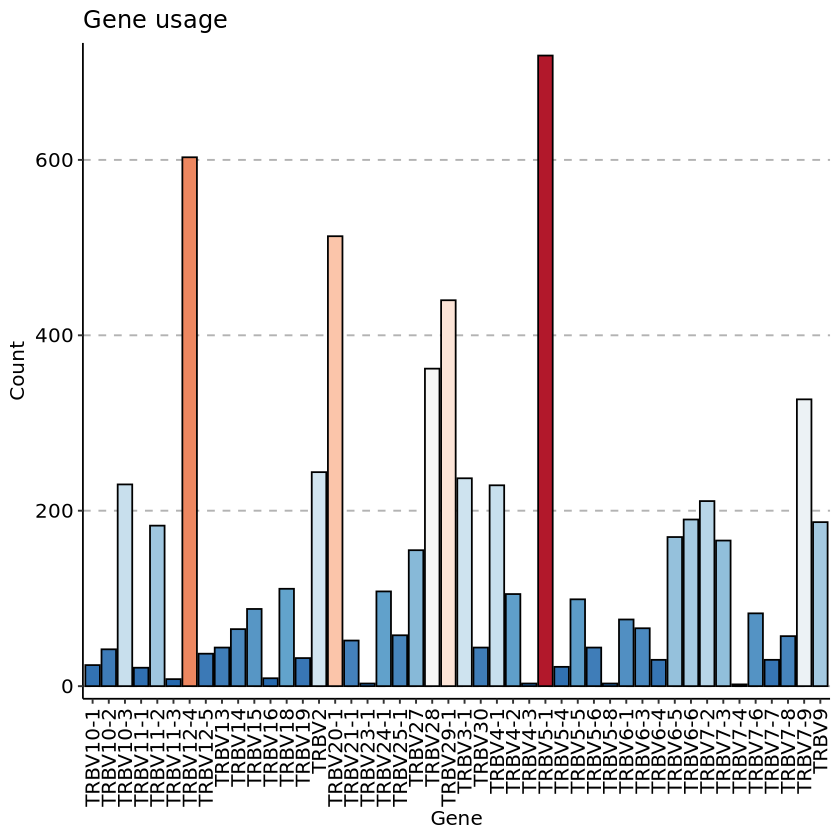

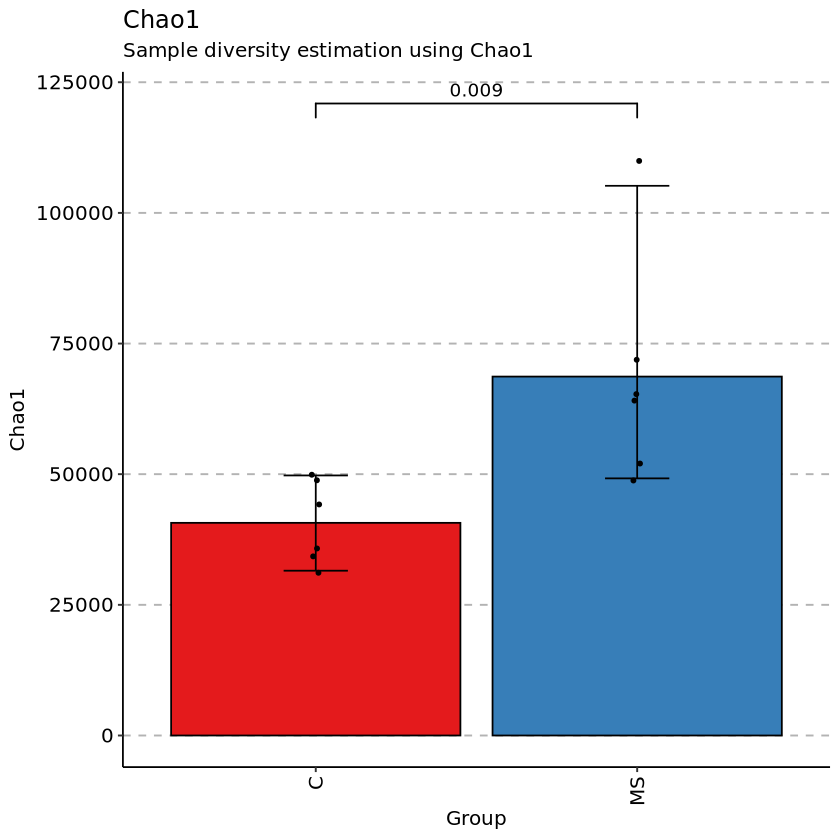

In [13]:
# The 5 lines summary. 
install.packages("immunarch")           # Install the package
library(immunarch); data(immdata)       # Load the package and the test dataset
repOverlap(immdata$data) %>% vis()      # Compute and visualise the most important statistics:
geneUsage(immdata$data[[1]]) %>% vis()  #     public clonotypes, gene usage, sample diversity
repDiversity(immdata$data) %>% vis(.by = "Status", .meta = immdata$meta)      # Group samples

# your data

10x has example datasets. You need to provide some information to them and you can use their data. 

In [14]:


library(immunarch)

# file_path = "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/10k_5p_Human_diseased_PBMC_ALL_Fresh/important_for_immunach/"
# mouse experiment: https://support.10xgenomics.com/single-cell-vdj/datasets/3.0.0/vdj_v1_mm_c57bl6_pbmc_t?
file_path = "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/mouse_TCR_enrichment_from_amplified_cDNA"

immdata_10x <- repLoad(file_path)





== Step 1/3: loading repertoire files... ==


Processing "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/mouse_TCR_enrichment_from_amplified_cDNA" ...

  -- [1/14] Parsing "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/mouse_TCR_enrichment_from_amplified_cDNA/fetch_data.txt" -- 
unsupported format, skipping

  -- [2/14] Parsing "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/mouse_TCR_enrichment_from_amplified_cDNA/vdj_v1_mm_c57bl6_pbmc_t_all_contig_annotations.csv" -- 
10x (filt.contigs)

  [!] Removed 2917 clonotypes with no nucleotide and amino acid CDR3 sequence.

  -- [3/14] Parsing "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/mouse_TCR_enrichment_from_amplified_cDNA/vdj_v1_mm_c57bl6_pbmc_t_all_contig_annotations.json" -- 
unsupported format, skipping

  -- [4/14] Parsing "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/mouse_TCR_enrichment_fro

In [15]:
# head(immdata_10x)

In [16]:
## IF you want to test the scripts with immdata: 
# immdata_10x <-immdata

In [17]:
# shinny app to display some of your data. 
exp_len <- repExplore(immdata_10x$data, .method = "len", .col = "aa")
p1 <- vis(exp_len)
# fixVis(p1)


In [18]:
exp_len <- repExplore(immdata_10x$data, .method = "len", .col = "aa")
exp_cnt <- repExplore(immdata_10x$data, .method = "count")
exp_vol <- repExplore(immdata_10x$data, .method = "volume")
p1 <- vis(exp_len)
p2 <- vis(exp_cnt)
p3 <- vis(exp_vol)



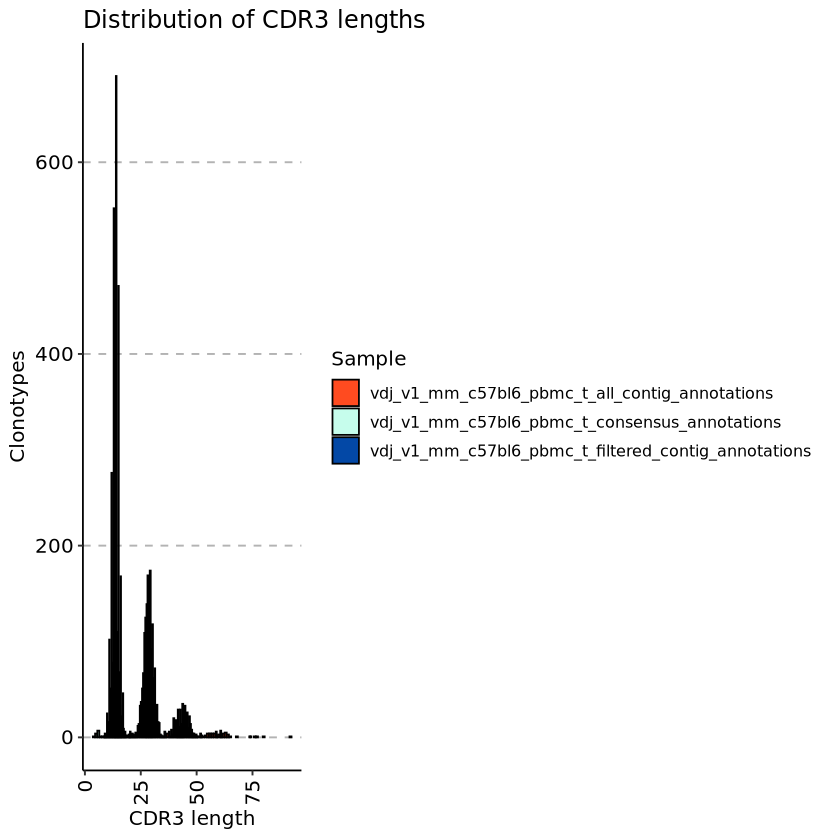

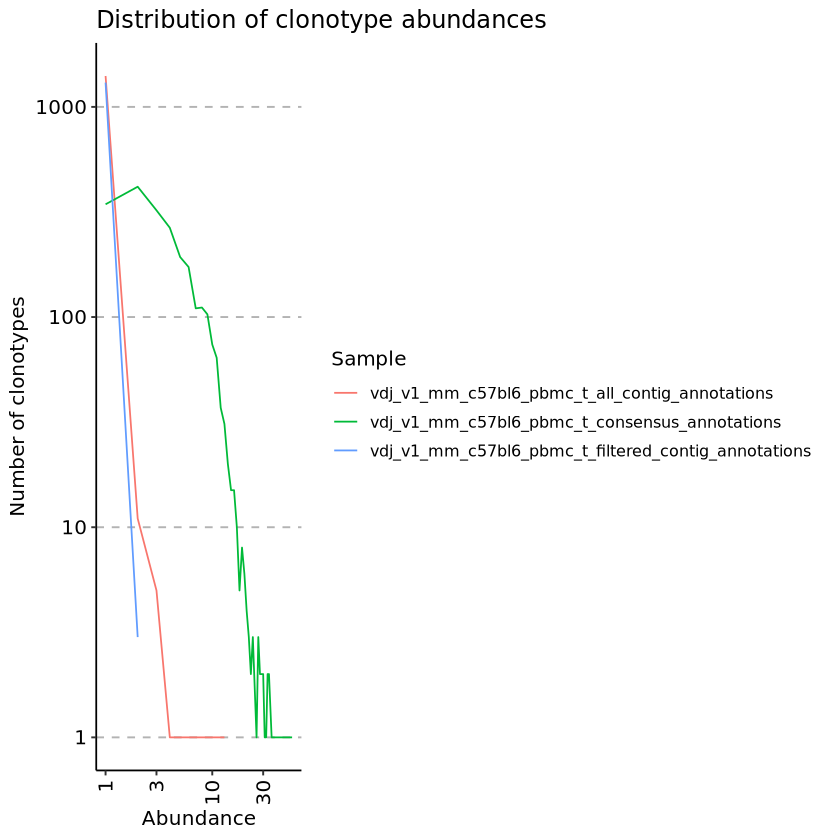

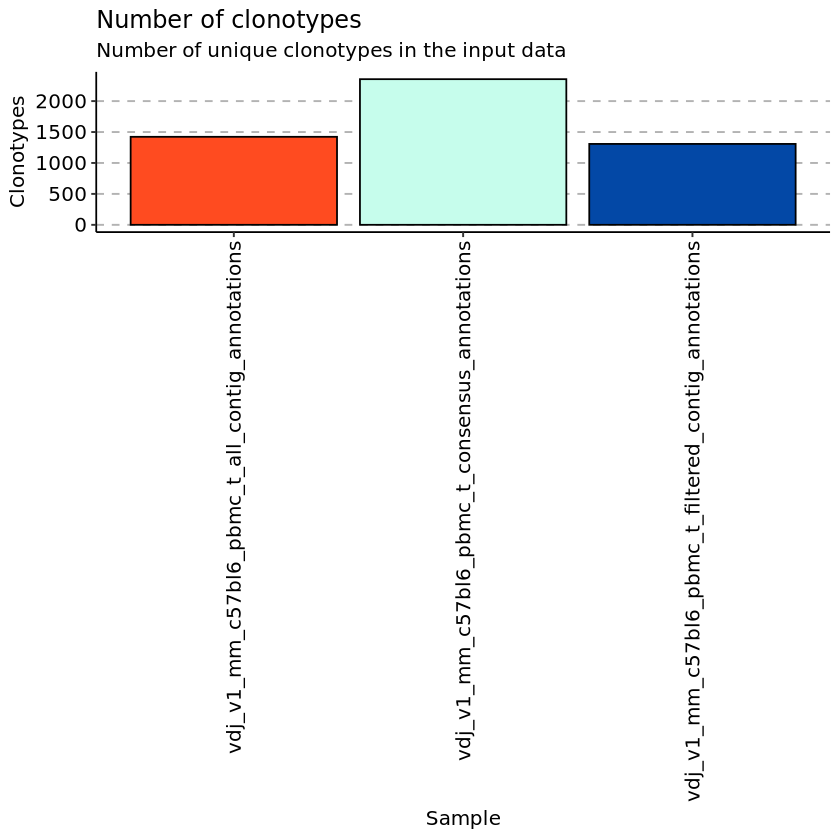

In [19]:
p1
p2 
p3

In [20]:
imm_pr <- repClonality(immdata_10x$data, .method = "clonal.prop")
imm_pr


,Clones,Percentage,Clonal.count.prop
vdj_v1_mm_c57bl6_pbmc_t_all_contig_annotations,100,10.0,0.07027407
vdj_v1_mm_c57bl6_pbmc_t_consensus_annotations,49,10.0,0.02080679
vdj_v1_mm_c57bl6_pbmc_t_filtered_contig_annotations,129,10.1,0.09862385


,10,100,1000,3000,10000
vdj_v1_mm_c57bl6_pbmc_t_all_contig_annotations,0.031972789,0.10000000,0.7122449,1,1
vdj_v1_mm_c57bl6_pbmc_t_consensus_annotations,0.029721564,0.16493835,0.7356087,1,1
vdj_v1_mm_c57bl6_pbmc_t_filtered_contig_annotations,0.009916095,0.07856598,0.7650648,1,1


Using Sample as id variables



Using Sample as id variables

Warning message:
“Unknown or uninitialised column: `p`.”
Warning message:
“Computation failed in `stat_compare_means()`.
Caused by error:
! argument "x" is missing, with no default”


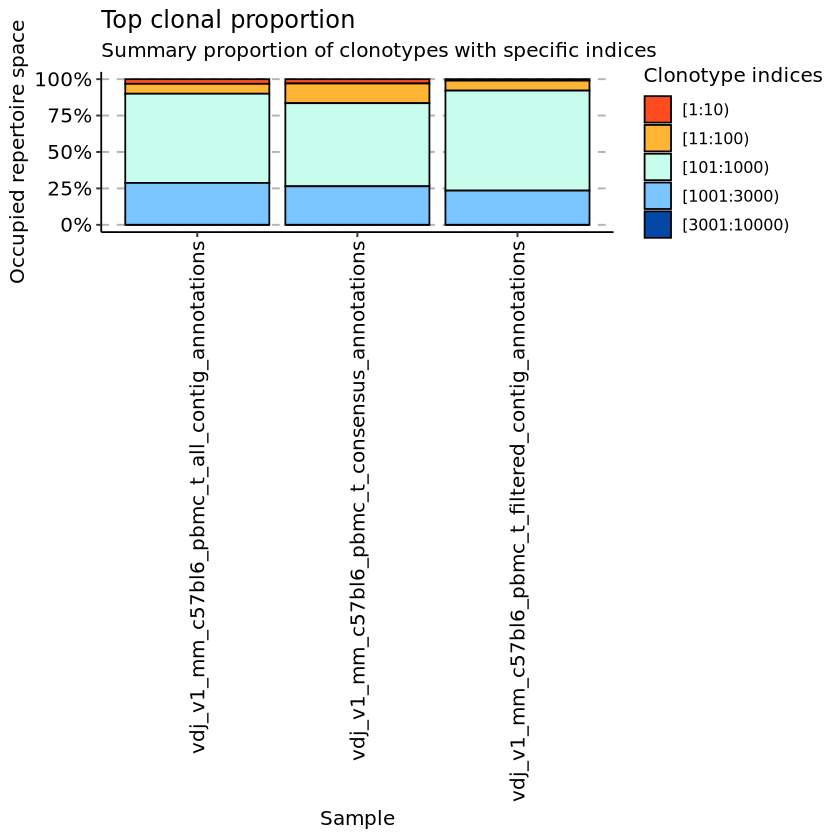

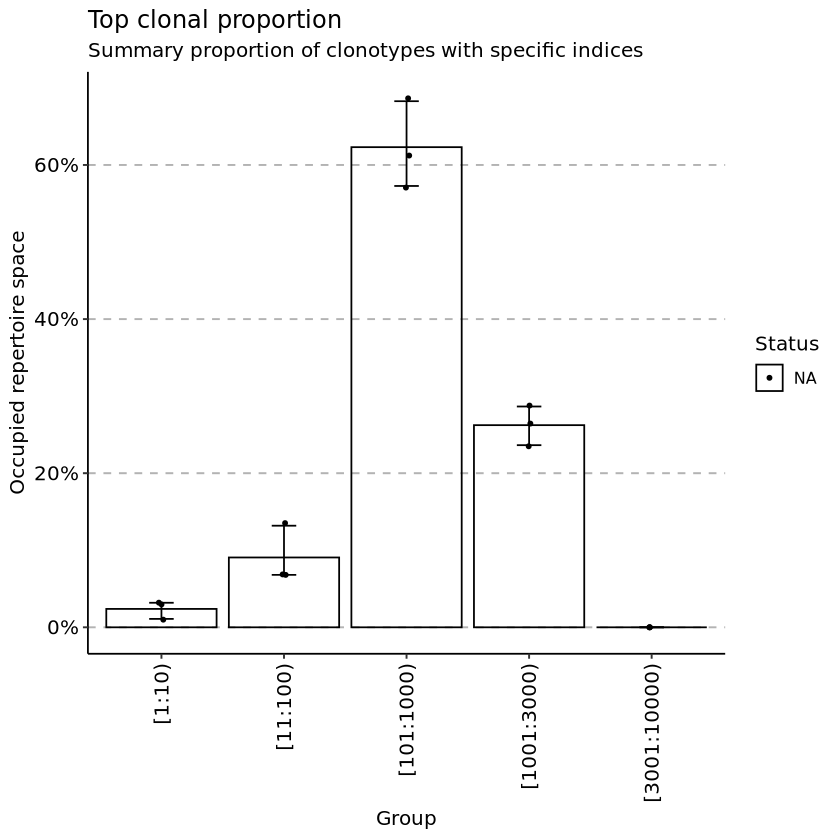

In [21]:
imm_top <- repClonality(immdata_10x$data, .method = "top", .head = c(10, 100, 1000, 3000, 10000))
imm_top
# Column 10 shows the proportion of the repertoire occupied by the top 10 most abundant clones
# High proportion (MS1) -->indicates a more clonal response, few clones dominate. So the 10 most abundant clones make the 20% of the repertoire (MS1)
# Small number of clones dominate the repertoire (MS1).

vis(imm_top) 
vis(imm_top, .by = "Status", .meta = immdata$meta)



Gene Analysis


In [22]:
gene_stats()
## Data table containing gene segments that are associated with IG and TCR for several species.
# For example, in Homo sapiens, there are 30 distincs D gene segments for the heavy chain, 13 J gene segments and 248 V gene segments...
# H---> heavy chain
# K; kappa, L; lambda ligth chain 



alias,species,ighd,ighj,ighv,igij,igkj,igkv,iglj,iglv,traj,trav,trbd,trbj,trbv,trdd,trdj,trdv,trgj,trgv
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bt,BosTaurus,21,4,25,0,1,6,5,26,46,0,0,0,0,5,3,0,6,15
cd,CamelusDromedarius,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,2
clf,CanisLupusFamiliaris,0,0,0,0,0,0,0,0,0,0,2,8,19,0,0,0,7,8
dr,DanioRerio,7,7,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hs,HomoSapiens,30,13,248,0,5,64,7,69,57,60,3,14,64,3,4,6,4,10
macmul,MacacaMulatta,24,7,19,0,4,83,5,0,0,0,2,15,58,0,0,0,0,0
mmc,MusMusculusCastaneus,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0
mmd,MusMusculusDomesticus,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
musmus,MusMusculus,32,8,225,0,8,109,3,5,42,145,2,14,23,2,3,7,0,11


In [23]:
imm_gu <- geneUsage(immdata_10x$data, "hs.trbv")


Using Names as id variables

Warning message:
“Removed 1408 rows containing missing values or values outside the scale range
(`geom_bar()`).”


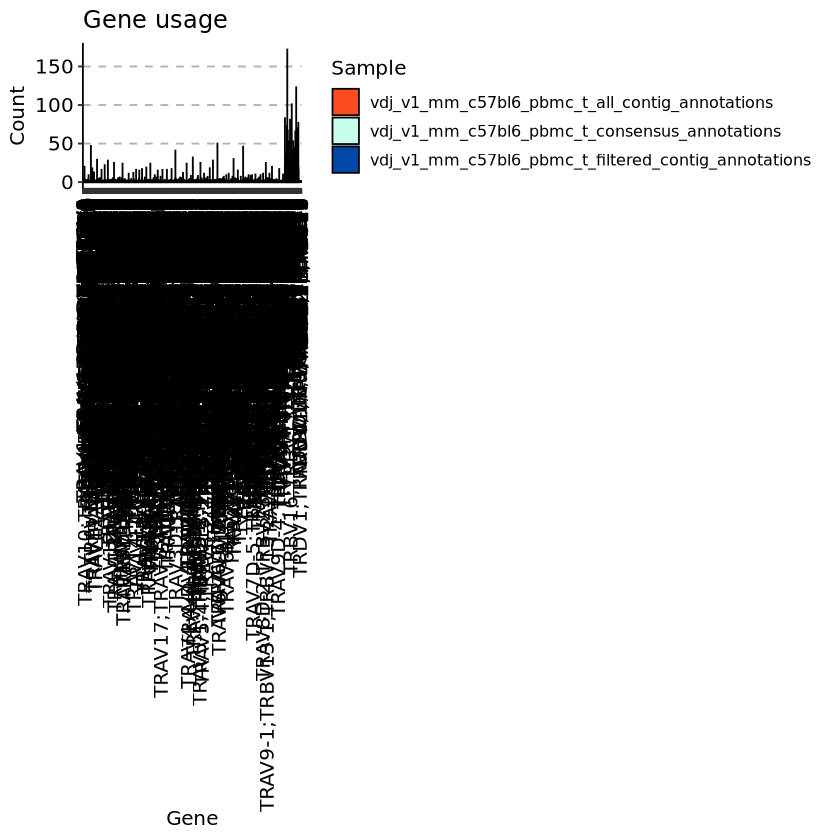

In [24]:
# this is a basic plot: 
vis(imm_gu)


In [25]:
# You can improve it with: 
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(tidyr)

# Replace NAs with 0 to handle missing counts
imm_gu <- imm_gu %>%
  mutate(across(starts_with("vdj"), ~ replace_na(., 0)))

# Filter to top 30 genes with highest total counts
top_genes <- imm_gu %>%
  mutate(Total_Count = rowSums(across(starts_with("vdj")))) %>%
  arrange(desc(Total_Count)) %>%
  slice(1:30) %>%  # Keep only top 30 genes
  select(-Total_Count)  # Drop the Total_Count column

# Convert data to long format for ggplot2 compatibility
imm_gu_long <- top_genes %>%
  pivot_longer(cols = starts_with("vdj"), 
               names_to = "Sample", 
               values_to = "Count")


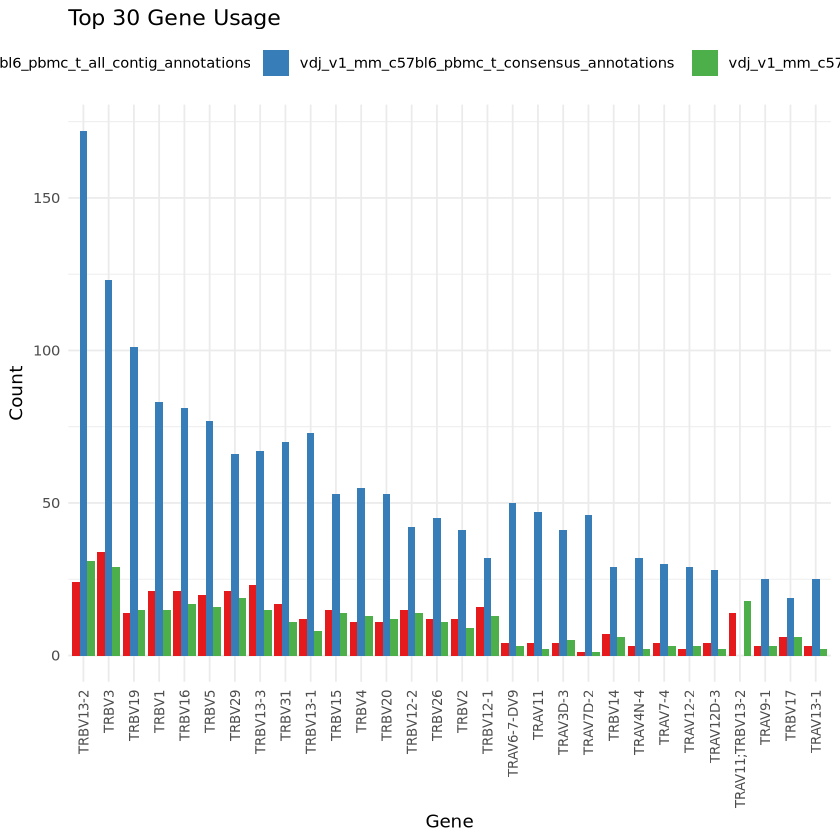

In [26]:
# Create the plot with ggplot2
ggplot(imm_gu_long, aes(x = reorder(Names, -Count), y = Count, fill = Sample)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Top 30 Gene Usage", x = "Gene", y = "Count") +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 8),
    legend.position = "top"
  ) +
  scale_fill_brewer(palette = "Set1")  # Use a color-blind-friendly palette

# Save the plot with custom dimensions
ggsave("top_gene_usage_plot.png", width = 25, height = 18, dpi = 500)


In [27]:
# Filter by .meta information
imm_gu <- geneUsage(immdata_10x$data, "hs.trbv", .norm = T)

# vis(imm_gu, .by = "Status", .meta = immdata$meta)

Using Names as id variables

Warning message:
“Removed 183 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 925 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 300 rows containing missing values or values outside the scale range
(`geom_bar()`).”


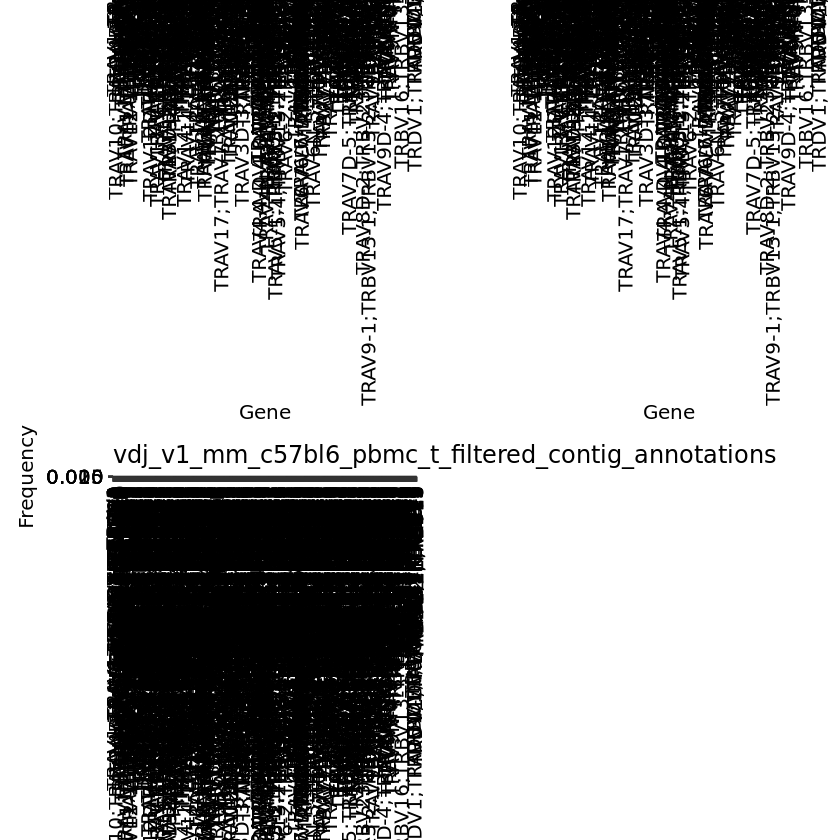

In [28]:
vis(imm_gu, .grid = T)

In [29]:
ggplot(imm_gu_long, aes(x = Names, y = Frequency, color = Sample)) +
  geom_point(position = position_jitter(width = 0.3, height = 0), alpha = 0.7) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
    legend.position = "top"
  ) +
  labs(
    x = "Gene",
    y = "Frequency",
    title = "Gene Usage by Sample Type"
  ) +
  scale_y_continuous(expand = c(0, 0))


ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Frequency' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_hand

In [30]:
# original from package:
# vis(imm_gu, .by = "Status", .meta = immdata$meta, .plot = "box")